# K-Vector Model (elvin Profile)

### Nexus-5x 전면 카메라

|resolution|fx|cx|fy|cy|k1|k2|p1|p2|k3|
|---|---|---|---|---|---|---|---|---|---|
|1920x1080|1433.4389|587.7184|1437.476|604.914|-0.4355|0.6174|-0.0008|-0.0049|-0.3697|
|1080x720|946.2767|612.9987|950.3305|326.0792|0.0438|-0.6156|-0.0125|-0.004|0.5669|

<br>


# imports

In [1]:
import sys
import cv2
import glob
import matplotlib.pyplot as plt

sys.path.append("../../../../")
%matplotlib inline

%run ../../../../al/actor/face.py
%run ../../../../ac/visualizer/plotter.py
%run ../../../../ac/visualizer/trajectory.py
%run ../../../../al/optics/parameter.py
%run ../../../../al/actor/screen.py
%run ../../../../al/feature/face/candide.py
%run ../../../../ds/device/nexus5x.py

Using TensorFlow backend.


# resource paths

In [2]:
candide_path="/home/chy/archive-model/candide/candide.npz"
land_mark_path="/home/chy/archive-model/candide/shape_predictor_68_face_landmarks.dat"
model_path = "/home/chy/archive-model/incubator/ove/exp-home2-model.json"
weight_path = "/home/chy/archive-model/incubator/ove/exp-home2-24e-weights.hdf5"
sample_path = "/home/chy/dev-bench/auto-catch/notes/dataset/profiles/elvin/"

# prepare data

In [3]:
def load_img(idx):
    img_path = "{}/frames/{}.jpg".format(sample_path, idx)
    return cv2.imread(img_path)

imgs = []
for idx in range(10):
    img = load_img(idx)
    print(img.shape)
    imgs.append(img)

(1280, 720, 3)
(1280, 720, 3)
(1280, 720, 3)
(1280, 720, 3)
(1280, 720, 3)
(1280, 720, 3)
(1280, 720, 3)
(1280, 720, 3)
(1280, 720, 3)
(1280, 720, 3)


# Face Module

In [4]:
candide = Candide(candide_path, land_mark_path)

intrinsic_param = IntrinsicParameters(946.2767, 950.3305, 612.9987, 326.0792)
screen = Screen(720, 1080)
camera = Camera(2.6, intrinsic_param, screen)

opt_predictor = OpticalAxisPredictor()
opt_predictor.load_model(model_path, weight_path)
face_model = FaceModel(candide)
face = Face(camera, face_model, opt_predictor)

# 검증

In [5]:
lk_vec, rk_vec = Vector3D(0,0,0), Vector3D(0,0,0)
trajectory = ScreenTrajectory()

In [6]:
def shot(idx, side="r"):
    def select(face, side):
        eye_img = face.r_eye_img if side == "r" else face.l_eye_img
        refs = face.get_references()
        pos = refs["{}_pos".format(side)]
        opt = refs["{}_opt".format(side)]
        tar = refs["{}_tar".format(side)]
        tar = Vector2D.from_np_vec(tar)
        
        return eye_img, pos, opt, tar

    def report(face):
        tx, ty = get_true_cam_xy(idx)
        eye_img, pos, opt, tar = select(face, side)
        show_image(eye_img, extent=(0,110,0,110), fig_size=(3, 3))
        trajectory.mark(idx, tar.x(), tar.y())
        print("[{}/{}] ---------------------------------------------".format(idx, side))
        # print("pos {}".format(pos))
        print("opt {}".format(opt))
        print("opt YP {}".format(opt.to_yaw_pitch()))
        print("tar {} / truth ({}, {})".format(tar, tx, ty))

    face.match(imgs[idx])
    face.analysis()
    face.compute_gaze_target_pos_in_mm(lk_vec, rk_vec)
    report(face)

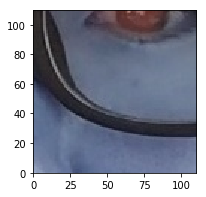

[0/r] ---------------------------------------------
opt (0.12 0.01 -0.99)
opt YP (-6.670370427397269, 0.3755941835322639)
tar (-17.14 83.73) / truth (-22, 66)


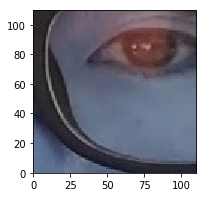

[1/r] ---------------------------------------------
opt (0.55 -0.18 -0.81)
opt YP (-34.138849585043666, -10.135773624509019)
tar (83.35 36.64) / truth (10, 10)


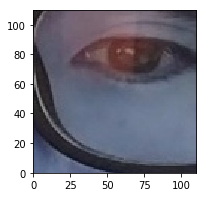

[2/r] ---------------------------------------------
opt (0.23 -0.63 -0.74)
opt YP (-17.568078120804245, -39.38450316950516)
tar (22.32 -74.99) / truth (10, 66)


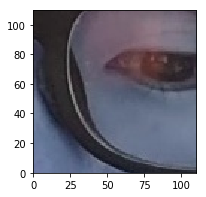

[3/r] ---------------------------------------------
opt (0.27 -0.38 -0.89)
opt YP (-17.147794383058557, -22.120009881835053)
tar (19.45 -3.00) / truth (10, 122)


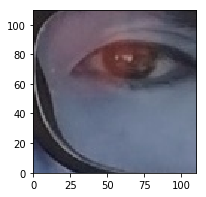

[4/r] ---------------------------------------------
opt (0.34 -0.57 -0.75)
opt YP (-24.30927163347902, -34.445921229749096)
tar (45.23 -57.49) / truth (-22, 10)


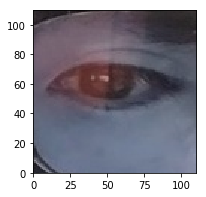

[5/r] ---------------------------------------------
opt (0.06 -0.12 -0.99)
opt YP (-3.618643186896041, -6.86532963951882)
tar (-15.10 40.81) / truth (-22, 66)


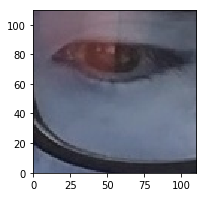

[6/r] ---------------------------------------------
opt (0.06 -0.69 -0.72)
opt YP (-5.138118232395166, -43.53266829775066)
tar (-10.39 -91.48) / truth (-22, 122)


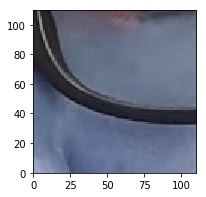

[7/r] ---------------------------------------------
opt (0.10 0.09 -0.99)
opt YP (-5.823371475028681, 4.880171015747757)
tar (-12.34 89.14) / truth (-53, 10)


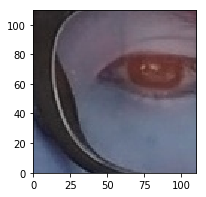

[8/r] ---------------------------------------------
opt (0.39 -0.49 -0.78)
opt YP (-26.844262192983404, -29.548989783551775)
tar (50.93 -46.46) / truth (-53, 66)


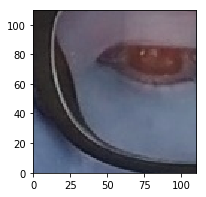

[9/r] ---------------------------------------------
opt (0.51 -0.59 -0.63)
opt YP (-39.36813120606463, -35.91664878825502)
tar (103.61 -94.97) / truth (-53, 122)


In [7]:
for i in range(10):
    shot(i)

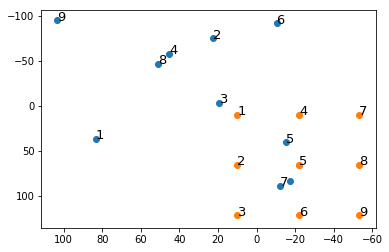

In [8]:
trajectory.plot_scatter()